#1. Import nessary liabraies TrashNet Dataset from Kaggle

In [2]:
!pip install -q torchinfo

In [3]:
import os
import kagglehub
from PIL import Image
import matplotlib.pyplot as plt

import random
from torchvision import transforms
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torchvision import models
from torchinfo import summary

import torch.nn as nn
import torch.optim as optim

from tqdm.auto import tqdm

import numpy as np

#2. Setup Device Agnostic Code

In [4]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

#3. Checking the hardware Details of Kuda

In [5]:
!nvidia-smi

Fri Jan  9 14:20:42 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#4. Download Trashnet Dataset from kaggle

In [6]:
#  Download TrashNet dataset from Kaggle
path = kagglehub.dataset_download("feyzazkefe/trashnet")

print("Dataset downloaded")
print("📁 Dataset path:", path)

Using Colab cache for faster access to the 'trashnet' dataset.
Dataset downloaded
📁 Dataset path: /kaggle/input/trashnet


#5. Check & Understand the Folder Structure

In [7]:
DATASET_ROOT = path
DATASET_PATH = os.path.join(path, "dataset-resized")

In [8]:
# STEP 2: Inspect folder structure

import os

print("📁 Root directory contents:\n")
for item in os.listdir(DATASET_ROOT):
    print(" -", item)


print("\n📂 Contents inside dataset-resized:\n")
for item in os.listdir(DATASET_PATH):
    print(" -", item)

📁 Root directory contents:

 - dataset-resized

📂 Contents inside dataset-resized:

 - metal
 - glass
 - paper
 - trash
 - cardboard
 - plastic


#6. Check Number of Classes & Class Names

In [9]:
# Verify class names and count classes
# Get class folders
class_names = sorted([
    d for d in os.listdir(DATASET_PATH)
    if os.path.isdir(os.path.join(DATASET_PATH, d))
])

print("TrashNet Dataset Summary")
print("---------------------------")
print("Number of classes:", len(class_names))
print("Class names:\n")

for idx, cls in enumerate(class_names):
    print(f"{idx}: {cls}")

TrashNet Dataset Summary
---------------------------
Number of classes: 6
Class names:

0: cardboard
1: glass
2: metal
3: paper
4: plastic
5: trash


#7. Counting no of images in each classes

DATASET SUMMARY
-------------------
Total images: 2527

Images per class:
 - cardboard: 403 images
 - glass: 501 images
 - metal: 410 images
 - paper: 594 images
 - plastic: 482 images
 - trash: 137 images


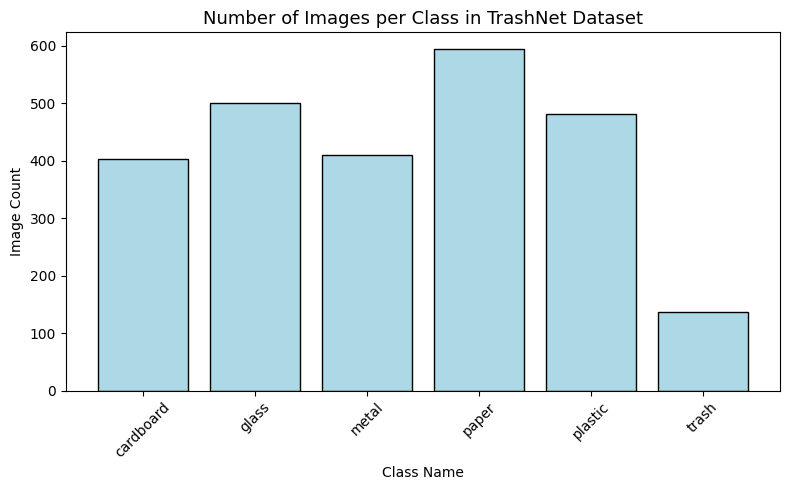

In [10]:
dataset_dir = DATASET_PATH

# Get class folders
class_names = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])

# Count images in each class
class_counts = {}
total_images = 0

for cls in class_names:
    class_path = os.path.join(dataset_dir, cls)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    class_counts[cls] = len(image_files)
    total_images += len(image_files)

# Print summary
print("DATASET SUMMARY")
print("-------------------")
print(f"Total images: {total_images}\n")
print("Images per class:")
for cls, count in class_counts.items():
    print(f" - {cls}: {count} images")

# Visualize class distribution
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='lightblue', edgecolor='black')
plt.title("Number of Images per Class in TrashNet Dataset", fontsize=13)
plt.xlabel("Class Name")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#8. Visualization

##8.1. Visualize 1–2 Images from kaggle Dataset using PIL

In [11]:
NUM_SAMPLES = 5  # number of filenames per class

print("Sample image filenames per class")
print("----------------------------------\n")

for class_name in sorted(os.listdir(DATASET_PATH)):
    class_path = os.path.join(DATASET_PATH, class_name)

    if not os.path.isdir(class_path):
        continue

    image_files = sorted([
        f for f in os.listdir(class_path)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ])

    print(f"Class: {class_name}")
    for img in image_files[:NUM_SAMPLES]:
        print("   ", img)
    print()

Sample image filenames per class
----------------------------------

Class: cardboard
    cardboard1.jpg
    cardboard10.jpg
    cardboard100.jpg
    cardboard101.jpg
    cardboard102.jpg

Class: glass
    glass1.jpg
    glass10.jpg
    glass100.jpg
    glass101.jpg
    glass102.jpg

Class: metal
    metal1.jpg
    metal10.jpg
    metal100.jpg
    metal101.jpg
    metal102.jpg

Class: paper
    paper1.jpg
    paper10.jpg
    paper100.jpg
    paper101.jpg
    paper102.jpg

Class: plastic
    plastic1.jpg
    plastic10.jpg
    plastic100.jpg
    plastic101.jpg
    plastic102.jpg

Class: trash
    trash1.jpg
    trash10.jpg
    trash100.jpg
    trash101.jpg
    trash102.jpg



##8.2. Visualize Image by Given Class Name & Image Name

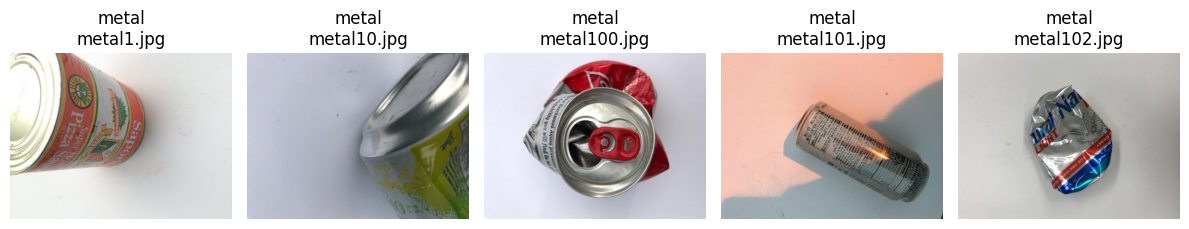

In [12]:
#  Visualize a single image using class name and image name
#  INPUTS (you control these)
CLASS_NAME = "metal"
IMAGE_NAMES = ["metal1.jpg",
            "metal10.jpg",
            "metal100.jpg",
            "metal101.jpg",
            "metal102.jpg" ]


# Plot images
plt.figure(figsize=(12, 4))

for idx, image_name in enumerate(IMAGE_NAMES):
    image_path = os.path.join(DATASET_PATH, CLASS_NAME, image_name)

    img = Image.open(image_path).convert("RGB")

    plt.subplot(1, len(IMAGE_NAMES), idx + 1)
    plt.imshow(img)
    plt.title(f"{CLASS_NAME}\n{image_name}")
    plt.axis("off")

plt.tight_layout()
plt.show()

##8.3. Visualize a Random Image from TrashNet

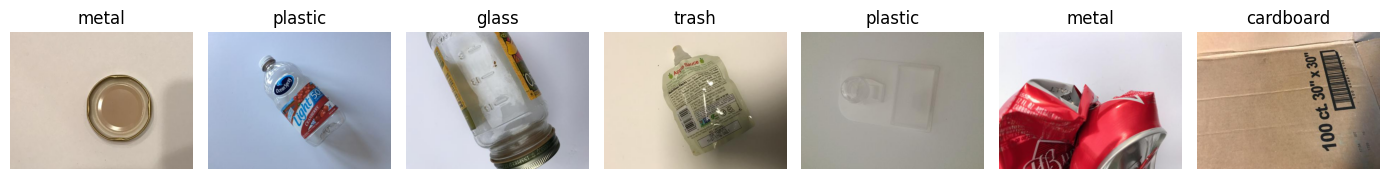

In [13]:
# Visualize 7 random images from the dataset
random.seed(43)

NUM_IMAGES = 7

# Get all class names
class_names = [
    d for d in os.listdir(DATASET_PATH)
    if os.path.isdir(os.path.join(DATASET_PATH, d))
]

# Randomly sample images (class + image)
samples = []

for _ in range(NUM_IMAGES):
    cls = random.choice(class_names)
    cls_path = os.path.join(DATASET_PATH, cls)

    image_files = [
        f for f in os.listdir(cls_path)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ]

    img_name = random.choice(image_files)
    samples.append((cls, img_name))

# Plot images
plt.figure(figsize=(14, 4))

for idx, (cls, img_name) in enumerate(samples):
    img_path = os.path.join(DATASET_PATH, cls, img_name)
    img = Image.open(img_path).convert("RGB")

    plt.subplot(1, NUM_IMAGES, idx + 1)
    plt.imshow(img)
    plt.title(f"{cls}")
    plt.axis("off")

plt.tight_layout()
plt.show()

##8.4. Check Image Metadata (H, W, Mode, Format)

In [14]:
# Display image metadata (one-line) for ALL classes
NUM_IMAGES_PER_CLASS = 5

print("TrashNet Image Metadata Summary\n")
print("=" * 120)

# Get all class names
class_names = sorted([
    d for d in os.listdir(DATASET_PATH)
    if os.path.isdir(os.path.join(DATASET_PATH, d))
])

for class_name in class_names:
    class_path = os.path.join(DATASET_PATH, class_name)

    image_files = [
        f for f in os.listdir(class_path)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ]

    sampled_images = random.sample(image_files, NUM_IMAGES_PER_CLASS)

    print(f"\n📦 Class: {class_name}")
    print("-" * 120)

    for img_name in sampled_images:
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)

        width, height = img.size  # PIL gives (W, H)

        print(
            f"Class       : {class_name} | "
            f"Image name  : {img_name} | "
            f"Height (H) x Width (W) : {height} x {width} | "
            f"Color mode : {img.mode} | "
            f"Format     : {img.format}"
        )

TrashNet Image Metadata Summary


📦 Class: cardboard
------------------------------------------------------------------------------------------------------------------------
Class       : cardboard | Image name  : cardboard46.jpg | Height (H) x Width (W) : 384 x 512 | Color mode : RGB | Format     : JPEG
Class       : cardboard | Image name  : cardboard397.jpg | Height (H) x Width (W) : 384 x 512 | Color mode : RGB | Format     : JPEG
Class       : cardboard | Image name  : cardboard158.jpg | Height (H) x Width (W) : 384 x 512 | Color mode : RGB | Format     : JPEG
Class       : cardboard | Image name  : cardboard309.jpg | Height (H) x Width (W) : 384 x 512 | Color mode : RGB | Format     : JPEG
Class       : cardboard | Image name  : cardboard231.jpg | Height (H) x Width (W) : 384 x 512 | Color mode : RGB | Format     : JPEG

📦 Class: glass
------------------------------------------------------------------------------------------------------------------------
Class       : glass | Ima

##8.5. Converting Images to PyTorch Tensors with Resize and Visualizion

In [15]:
# Convert images to PyTorch tensors only (no visualization)
NUM_IMAGES_PER_CLASS = 5
TARGET_SIZE = 224  # standard input size for pretrained CNNs

# Transform: resize + tensor (NO normalization yet)
transform = transforms.Compose([
    transforms.Resize((TARGET_SIZE, TARGET_SIZE)),
    transforms.ToTensor()  # converts to [C, H, W] in range [0,1]
])


# Get class names
class_names = sorted([
    d for d in os.listdir(DATASET_PATH)
    if os.path.isdir(os.path.join(DATASET_PATH, d))
])

print("Converting images to tensors (no normalization)\n")
print("-" * 60)

tensor_samples = []

for class_name in class_names:
    class_path = os.path.join(DATASET_PATH, class_name)

    image_files = [
        f for f in os.listdir(class_path)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ]

    sampled_images = random.sample(image_files, NUM_IMAGES_PER_CLASS)

    for img_name in sampled_images:
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path).convert("RGB")

        img_tensor = transform(img)

        tensor_samples.append((class_name, img_name, img_tensor))

        print(
            f"Class: {class_name:<10} | "
            f"Image: {img_name:<15} | "
            f"Tensor shape: {tuple(img_tensor.shape)} | "
            f"dtype: {img_tensor.dtype}"
        )

# Quick sanity check
example = tensor_samples[0][2]
print("\nSanity check")
print("Min value:", float(example.min()))
print("Max value:", float(example.max()))

Converting images to tensors (no normalization)

------------------------------------------------------------
Class: cardboard  | Image: cardboard320.jpg | Tensor shape: (3, 224, 224) | dtype: torch.float32
Class: cardboard  | Image: cardboard306.jpg | Tensor shape: (3, 224, 224) | dtype: torch.float32
Class: cardboard  | Image: cardboard344.jpg | Tensor shape: (3, 224, 224) | dtype: torch.float32
Class: cardboard  | Image: cardboard330.jpg | Tensor shape: (3, 224, 224) | dtype: torch.float32
Class: cardboard  | Image: cardboard145.jpg | Tensor shape: (3, 224, 224) | dtype: torch.float32
Class: glass      | Image: glass458.jpg    | Tensor shape: (3, 224, 224) | dtype: torch.float32
Class: glass      | Image: glass283.jpg    | Tensor shape: (3, 224, 224) | dtype: torch.float32
Class: glass      | Image: glass228.jpg    | Tensor shape: (3, 224, 224) | dtype: torch.float32
Class: glass      | Image: glass270.jpg    | Tensor shape: (3, 224, 224) | dtype: torch.float32
Class: glass      | I

In [16]:
tensor_samples[0]

('cardboard',
 'cardboard320.jpg',
 tensor([[[0.9333, 0.9373, 0.9333,  ..., 0.6667, 0.6667, 0.6667],
          [0.9373, 0.9294, 0.9255,  ..., 0.6745, 0.6627, 0.6588],
          [0.9451, 0.9333, 0.9333,  ..., 0.6745, 0.6627, 0.6549],
          ...,
          [0.4314, 0.4235, 0.4078,  ..., 0.8431, 0.8431, 0.8431],
          [0.4353, 0.4314, 0.4157,  ..., 0.8588, 0.8588, 0.8588],
          [0.4353, 0.4353, 0.4275,  ..., 0.8667, 0.8667, 0.8667]],
 
         [[0.7451, 0.7490, 0.7451,  ..., 0.4471, 0.4471, 0.4431],
          [0.7490, 0.7412, 0.7373,  ..., 0.4510, 0.4392, 0.4353],
          [0.7569, 0.7451, 0.7451,  ..., 0.4510, 0.4392, 0.4314],
          ...,
          [0.3137, 0.3059, 0.2902,  ..., 0.7412, 0.7412, 0.7373],
          [0.3176, 0.3137, 0.2980,  ..., 0.7529, 0.7490, 0.7490],
          [0.3176, 0.3176, 0.3098,  ..., 0.7608, 0.7569, 0.7569]],
 
         [[0.5647, 0.5686, 0.5647,  ..., 0.2275, 0.2235, 0.2235],
          [0.5686, 0.5608, 0.5569,  ..., 0.2353, 0.2235, 0.2196],
     

In [17]:
tensor_samples[0][2]

tensor([[[0.9333, 0.9373, 0.9333,  ..., 0.6667, 0.6667, 0.6667],
         [0.9373, 0.9294, 0.9255,  ..., 0.6745, 0.6627, 0.6588],
         [0.9451, 0.9333, 0.9333,  ..., 0.6745, 0.6627, 0.6549],
         ...,
         [0.4314, 0.4235, 0.4078,  ..., 0.8431, 0.8431, 0.8431],
         [0.4353, 0.4314, 0.4157,  ..., 0.8588, 0.8588, 0.8588],
         [0.4353, 0.4353, 0.4275,  ..., 0.8667, 0.8667, 0.8667]],

        [[0.7451, 0.7490, 0.7451,  ..., 0.4471, 0.4471, 0.4431],
         [0.7490, 0.7412, 0.7373,  ..., 0.4510, 0.4392, 0.4353],
         [0.7569, 0.7451, 0.7451,  ..., 0.4510, 0.4392, 0.4314],
         ...,
         [0.3137, 0.3059, 0.2902,  ..., 0.7412, 0.7412, 0.7373],
         [0.3176, 0.3137, 0.2980,  ..., 0.7529, 0.7490, 0.7490],
         [0.3176, 0.3176, 0.3098,  ..., 0.7608, 0.7569, 0.7569]],

        [[0.5647, 0.5686, 0.5647,  ..., 0.2275, 0.2235, 0.2235],
         [0.5686, 0.5608, 0.5569,  ..., 0.2353, 0.2235, 0.2196],
         [0.5765, 0.5647, 0.5647,  ..., 0.2353, 0.2235, 0.

##8.6. Convert a PyTorch Tensor to Image and Visualization

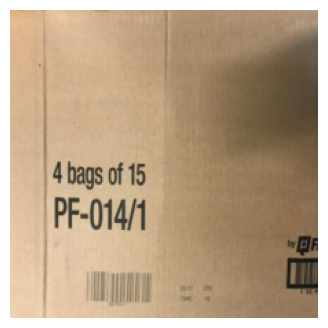

In [18]:
# Convert a PyTorch tensor to image
# Assume this tensor already exists
# Shape: (3, H, W), values in [0, 1]
tensor = tensor_samples[3][2]

# Convert (C, H, W) -> (H, W, C)
img = tensor.permute(1, 2, 0)

# Display
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.axis("off")
plt.show()

#9. Dataset & Datafolder

In [19]:
# Create ImageFolder dataset + train/val DataLoaders
BATCH_SIZE = 32
IMAGE_SIZE = 224

##9.1. Create a function for creating Dataset & Datafolder

In [20]:
from torch.utils.data import DataLoader, random_split
from torchvision import datasets

def create_dataloaders(
    dataset_path,
    transform,
    batch_size=32,
    train_split=0.8,
    shuffle_train=True ):

    """
    Create train/test DataLoaders from an image dataset.

    Args:
        dataset_path (str): Path to the dataset directory.
        transform (torchvision.transforms): Transformations to apply to images.
        batch_size (int, optional): Batch size for DataLoaders. Default is 32.
        train_split (float, optional): Ratio of data used for training. Default is 0.8.
        shuffle_train (bool, optional): Whether to shuffle training data. Default is True.

    Returns:
        tuple: (train_loader, test_loader, class_names)
            - train_loader (DataLoader): DataLoader for training data
            - test_loader (DataLoader): DataLoader for test data
            - class_names (list): List of class names
    """
    # Load dataset
    dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

    # Split into train/test sets
    train_size = int(train_split * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle_train)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Print summary
    print("\n Dataset & DataLoaders ready")
    print(f"Total images : {len(dataset)}")
    print(f"Train images : {len(train_dataset)}")
    print(f"Test images  : {len(test_dataset)}")
    print(f"Classes      : {dataset.classes}\n")

    return train_loader, test_loader, dataset.classes

##9.2. Create a transform (without Data Augumentation)

In [21]:
# Transform (Without Data Augementation)
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

##9.3. Create traindata loader & test data loader

In [22]:
train_loader, test_loader, class_names = create_dataloaders(
                                                    dataset_path=DATASET_PATH,
                                                    transform=transform,
                                                    batch_size=BATCH_SIZE,
                                                    train_split=0.8,
                                                    shuffle_train=True
                                                )
num_classes = len(class_names)


 Dataset & DataLoaders ready
Total images : 2527
Train images : 2021
Test images  : 506
Classes      : ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']



##9.4. Visualize a Batch from DataLoader

In [23]:
images, labels = next(iter(train_loader))
images, labels

(tensor([[[[0.9804, 0.9804, 0.9804,  ..., 0.6706, 0.6667, 0.6588],
           [0.9804, 0.9804, 0.9804,  ..., 0.6706, 0.6667, 0.6588],
           [0.9765, 0.9765, 0.9765,  ..., 0.6706, 0.6667, 0.6588],
           ...,
           [0.8431, 0.8431, 0.8431,  ..., 0.5569, 0.5529, 0.5490],
           [0.8431, 0.8431, 0.8431,  ..., 0.5529, 0.5490, 0.5490],
           [0.8431, 0.8431, 0.8431,  ..., 0.5529, 0.5490, 0.5451]],
 
          [[0.9843, 0.9843, 0.9843,  ..., 0.6549, 0.6510, 0.6431],
           [0.9843, 0.9843, 0.9843,  ..., 0.6549, 0.6510, 0.6431],
           [0.9804, 0.9804, 0.9804,  ..., 0.6549, 0.6510, 0.6431],
           ...,
           [0.8353, 0.8353, 0.8353,  ..., 0.5412, 0.5373, 0.5333],
           [0.8353, 0.8353, 0.8353,  ..., 0.5373, 0.5333, 0.5333],
           [0.8353, 0.8353, 0.8353,  ..., 0.5373, 0.5333, 0.5294]],
 
          [[0.9922, 0.9922, 0.9922,  ..., 0.6118, 0.6078, 0.6000],
           [0.9922, 0.9922, 0.9922,  ..., 0.6118, 0.6078, 0.6000],
           [0.9882, 0.98

##9.5. Visualize random 8 images from Dataloader

In [24]:
images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [25]:
num_images = min(8, images.size(0))

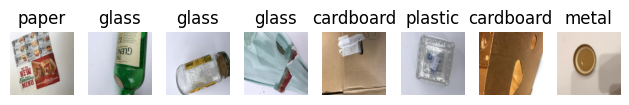

In [26]:
for i in range(num_images):
    img = images[i].permute(1, 2, 0)  # (H, W, C)
    label = labels[i].item()

    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis("off")

plt.tight_layout()
plt.show()

#10. Model creation & Visualization

##10.1. Load Pretrained Weights & Summarize with torchinfo

In [27]:
# Load pretrained model and visualize with torchinfo

# Load pretrained ResNet18
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Move model to device
model = model.to(device)

# Visualize model architecture
summary(
    model,
    input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
    # col_names=["input_size"], # uncomment for smaller output
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1000]           --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   9,408                True
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   128                  True
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   True
│    └─BasicBlock (0)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   True
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     36,864               True
│    │    └─BatchN

###10.1.1. Freeze all the parameter

In [28]:
for param in model.parameters():
  param.requires_grad=False

In [29]:
# Visualize model architecture
summary(
    model,
    input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
    # col_names=["input_size"], # uncomment for smaller output
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1000]           --                   False
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   False
│    └─BasicBlock (0)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (36,864)             False
│    │    └─

###10.1.2. Replace final fully connected layer & unfreeze it also

In [30]:
for param in model.fc.parameters():
    param.requires_grad = True

In [31]:
# Replace final fully connected layer
model.fc = nn.Linear(model.fc.in_features, out_features=num_classes)

###10.1.3. Visualize the final Model Architecture

In [32]:
# Visualize model architecture
summary(
    model,
    input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
    # col_names=["input_size"], # uncomment for smaller output
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 6]              --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   False
│    └─BasicBlock (0)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (36,864)             False
│    │    

###10.1.4. Setup loss function & optimizer

In [33]:
!pip install --upgrade torch triton

In [34]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

###10.1.5. Define a function for plotting the loss curve & Accuracy

In [35]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [36]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
               device: torch.device):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [37]:
# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device: torch.device = device):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    model.to(device)

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn, device=device)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [38]:
# train (val_loader is your test_dataloader here)
results = train(
    model=model,
    train_dataloader=train_loader,
    test_dataloader=test_loader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=15,
    device=device
)

results

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3297 | train_acc: 0.5054 | test_loss: 0.9544 | test_acc: 0.6732
Epoch: 2 | train_loss: 0.8500 | train_acc: 0.7269 | test_loss: 0.7505 | test_acc: 0.7245
Epoch: 3 | train_loss: 0.7064 | train_acc: 0.7599 | test_loss: 0.6664 | test_acc: 0.7635
Epoch: 4 | train_loss: 0.6164 | train_acc: 0.7947 | test_loss: 0.6065 | test_acc: 0.7822
Epoch: 5 | train_loss: 0.5790 | train_acc: 0.8091 | test_loss: 0.6079 | test_acc: 0.7806
Epoch: 6 | train_loss: 0.5309 | train_acc: 0.8203 | test_loss: 0.5632 | test_acc: 0.7958
Epoch: 7 | train_loss: 0.5238 | train_acc: 0.8238 | test_loss: 0.5436 | test_acc: 0.8123
Epoch: 8 | train_loss: 0.4896 | train_acc: 0.8359 | test_loss: 0.5340 | test_acc: 0.8089
Epoch: 9 | train_loss: 0.4977 | train_acc: 0.8202 | test_loss: 0.5487 | test_acc: 0.8060
Epoch: 10 | train_loss: 0.4570 | train_acc: 0.8398 | test_loss: 0.5130 | test_acc: 0.8021
Epoch: 11 | train_loss: 0.4363 | train_acc: 0.8572 | test_loss: 0.5126 | test_acc: 0.8123
Epoch: 12 | train_l

{'train_loss': [1.3297188617289066,
  0.8500436041504145,
  0.7064376105554402,
  0.6163972225040197,
  0.5789892436005175,
  0.5309374067001045,
  0.5238213143311441,
  0.48964315792545676,
  0.4977044665720314,
  0.4569883986841887,
  0.43625033600255847,
  0.41899728402495384,
  0.40618324442766607,
  0.3983278542291373,
  0.3826131480745971],
 'train_acc': [0.50537109375,
  0.72685546875,
  0.75986328125,
  0.7947265625,
  0.80908203125,
  0.8203125,
  0.823828125,
  0.8359375,
  0.82021484375,
  0.83984375,
  0.8572265625,
  0.85498046875,
  0.8619140625,
  0.8611328125,
  0.87724609375],
 'test_loss': [0.9544375985860825,
  0.7505352608859539,
  0.6663967184722424,
  0.6065393667668104,
  0.6078991368412971,
  0.56319610029459,
  0.5435572899878025,
  0.5339817684143782,
  0.5486842524260283,
  0.5129711031913757,
  0.5125771015882492,
  0.4984362702816725,
  0.49707676097750664,
  0.49054937437176704,
  0.4895894341170788],
 'test_acc': [0.6732271634615384,
  0.7244591346153846,

In [39]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

###10.1.6. Visualize the loss curve & Accuracy

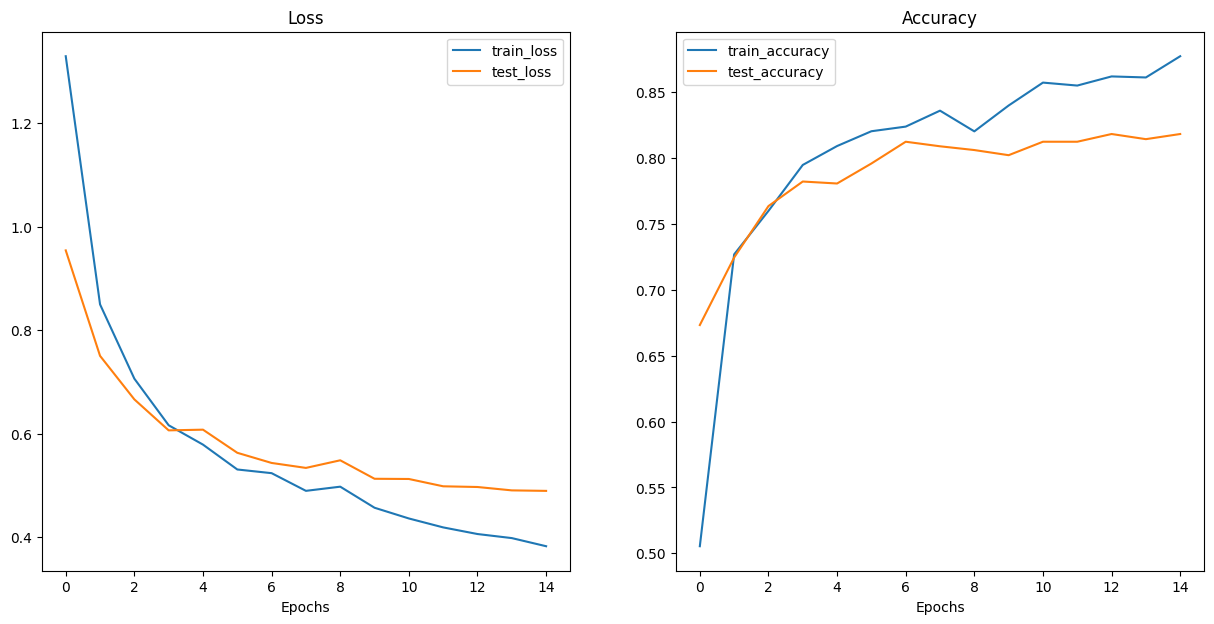

In [40]:
plot_loss_curves(results)

###10.1.7. Confusion Matrix and calculate the various evaluation Matrix


In [41]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def confusion_matrix_and_evaluation_metics(model: torch.nn.Module,
                                           class_names:List,

                                           ):
  model.eval()
  y_true, y_pred = [], []

  with torch.inference_mode():
      for X, y in test_loader:
          X, y = X.to(device), y.to(device)
          logits = model(X)
          preds = logits.argmax(dim=1)

          y_true.extend(y.cpu().numpy())
          y_pred.extend(preds.cpu().numpy())

      # Confusion matrix
      cm = confusion_matrix(y_true, y_pred)
      disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

  plt.figure(figsize=(7, 7))
  disp.plot(xticks_rotation=45, values_format="d")
  plt.title("Confusion Matrix (Testing)")
  plt.show()

  # Report
  print("\nClassification Report (Testing):\n")
  print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

<Figure size 700x700 with 0 Axes>

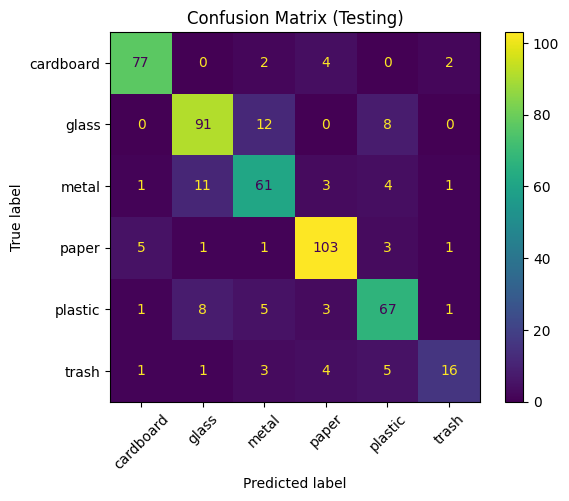


Classification Report (Testing):

              precision    recall  f1-score   support

   cardboard     0.9059    0.9059    0.9059        85
       glass     0.8125    0.8198    0.8161       111
       metal     0.7262    0.7531    0.7394        81
       paper     0.8803    0.9035    0.8918       114
     plastic     0.7701    0.7882    0.7791        85
       trash     0.7619    0.5333    0.6275        30

    accuracy                         0.8202       506
   macro avg     0.8095    0.7840    0.7933       506
weighted avg     0.8195    0.8202    0.8186       506



In [42]:
confusion_matrix_and_evaluation_metics(model=model,class_names=class_names)

In [43]:
"""
STEP X: INFERENCE TIME TEST
----------------------------
This step measures the real-time performance of the trained model.

Goal:
  - Evaluate how fast the model can process images (latency & throughput)
  - Confirm suitability for real-world applications like conveyor-based sorting

Process:
  1. Select N random samples from the test_loader.
  2. Run forward passes (no gradient calculation).
  3. Measure total elapsed time using time.perf_counter().
  4. Report:
      - Average inference time per image (milliseconds)
      - Throughput (images per second)

This test supports both GPU and CPU inference.
"""

import time
import torch


def test_inference_speed(model, test_loader, device, num_batches=5):
    model.eval()
    total_images, total_time = 0, 0.0

    # Warm-up (especially important for GPU timing accuracy)
    with torch.no_grad():
        for i, (images, _) in enumerate(test_loader):
            images = images.to(device)
            _ = model(images)
            if i == 1:
                break

    # Measure inference time
    with torch.no_grad():
        start_time = time.perf_counter()

        for i, (images, _) in enumerate(test_loader):
            images = images.to(device)
            torch.cuda.synchronize() if device.type == "cuda" else None

            batch_start = time.perf_counter()
            _ = model(images)
            torch.cuda.synchronize() if device.type == "cuda" else None
            batch_end = time.perf_counter()

            batch_time = batch_end - batch_start
            total_time += batch_time
            total_images += images.size(0)

            if i + 1 >= num_batches:  # Limit for quick test
                break

        end_time = time.perf_counter()

    avg_time_per_image = (total_time / total_images) * 1000  # milliseconds
    throughput = total_images / (end_time - start_time)

    print(f"⚡ Inference Performance Summary ({device.type.upper()})")
    print(f" - Tested on {total_images} images ({num_batches} batches)")
    print(f" - Avg Inference Time: {avg_time_per_image:.3f} ms/image")
    print(f" - Throughput: {throughput:.2f} images/sec")

    return avg_time_per_image, throughput

###10.1.8. test infrence speed

In [44]:
# Run the inference test
test_inference_speed(model, test_loader, device, num_batches=10)

⚡ Inference Performance Summary (CUDA)
 - Tested on 320 images (10 batches)
 - Avg Inference Time: 1.125 ms/image
 - Throughput: 91.12 images/sec


(1.1253631906242845, 91.12183188508455)

#11. EfficientNet_B2 Model

##11.1. load EfficientNet_B2 Pretrained weights & summarize with torchinfo

In [45]:
# Lets Use EfficientNet for the same task:
eff_weights = models.EfficientNet_B2_Weights.DEFAULT
model_1 = models.efficientnet_b2(weights=eff_weights).to(device)
model_1 = model_1.to(device)
model_1

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth


100%|██████████| 35.2M/35.2M [00:00<00:00, 77.0MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [46]:
# Visualize model architecture
summary(
    model_1,
    input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
    # col_names=["input_size"], # uncomment for smaller output
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1408, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

##11.1.1. Freeze all the parameter

In [47]:
for param in model_1.parameters():
    param.requires_grad = False

In [48]:
# Visualize model architecture
summary(
    model_1,
    input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
    # col_names=["input_size"], # uncomment for smaller output
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   False
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1408, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16

###11.1.2. Replace final fully connected layer & unfreeze it also

In [49]:
model_1.classifier[1] = torch.nn.Linear(in_features=1408, out_features=6)

###11.1.3. Visualize the final model Architecture

In [50]:
# Visualize model architecture
summary(
    model_1,
    input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
    # col_names=["input_size"], # uncomment for smaller output
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 6]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1408, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

###11.1.4. Train & test the Model

In [51]:
# train (val_loader is your test_dataloader here)
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)
results_1 = train(
    model=model_1,
    train_dataloader=train_loader,
    test_dataloader=test_loader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=15,
    device=device
)

results_1

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.2685 | train_acc: 0.5713 | test_loss: 0.9192 | test_acc: 0.7635
Epoch: 2 | train_loss: 0.8369 | train_acc: 0.7646 | test_loss: 0.7339 | test_acc: 0.7991
Epoch: 3 | train_loss: 0.6706 | train_acc: 0.8014 | test_loss: 0.6365 | test_acc: 0.8313
Epoch: 4 | train_loss: 0.6110 | train_acc: 0.8067 | test_loss: 0.5920 | test_acc: 0.8176
Epoch: 5 | train_loss: 0.5487 | train_acc: 0.8392 | test_loss: 0.5590 | test_acc: 0.8211
Epoch: 6 | train_loss: 0.5208 | train_acc: 0.8286 | test_loss: 0.5320 | test_acc: 0.8293
Epoch: 7 | train_loss: 0.5015 | train_acc: 0.8292 | test_loss: 0.5065 | test_acc: 0.8430
Epoch: 8 | train_loss: 0.4780 | train_acc: 0.8414 | test_loss: 0.5048 | test_acc: 0.8313
Epoch: 9 | train_loss: 0.4616 | train_acc: 0.8487 | test_loss: 0.4920 | test_acc: 0.8430
Epoch: 10 | train_loss: 0.4552 | train_acc: 0.8470 | test_loss: 0.4923 | test_acc: 0.8371
Epoch: 11 | train_loss: 0.4441 | train_acc: 0.8572 | test_loss: 0.4842 | test_acc: 0.8434
Epoch: 12 | train_l

{'train_loss': [1.268549027852714,
  0.836912093218416,
  0.6705984338186681,
  0.6109920837916434,
  0.5487104947678745,
  0.5207741241902113,
  0.501480299513787,
  0.4779576712753624,
  0.4615861251950264,
  0.4552387094590813,
  0.4440951105207205,
  0.4404457884375006,
  0.40895713958889246,
  0.42030358756892383,
  0.39939945260994136],
 'train_acc': [0.5712890625,
  0.7646484375,
  0.8013671875,
  0.80673828125,
  0.83916015625,
  0.82861328125,
  0.82919921875,
  0.84140625,
  0.84873046875,
  0.84697265625,
  0.8572265625,
  0.85703125,
  0.86943359375,
  0.8533203125,
  0.87109375],
 'test_loss': [0.9191617779433727,
  0.7338562719523907,
  0.6364705376327038,
  0.5919814445078373,
  0.558983726426959,
  0.5320226512849331,
  0.506466705352068,
  0.5048072561621666,
  0.49204842932522297,
  0.49231083132326603,
  0.4842496048659086,
  0.4732502344995737,
  0.4644511044025421,
  0.4656578842550516,
  0.46634190157055855],
 'test_acc': [0.7635216346153846,
  0.7991286057692307,

###11.1.5. Visualize the loss curve & Accuracy

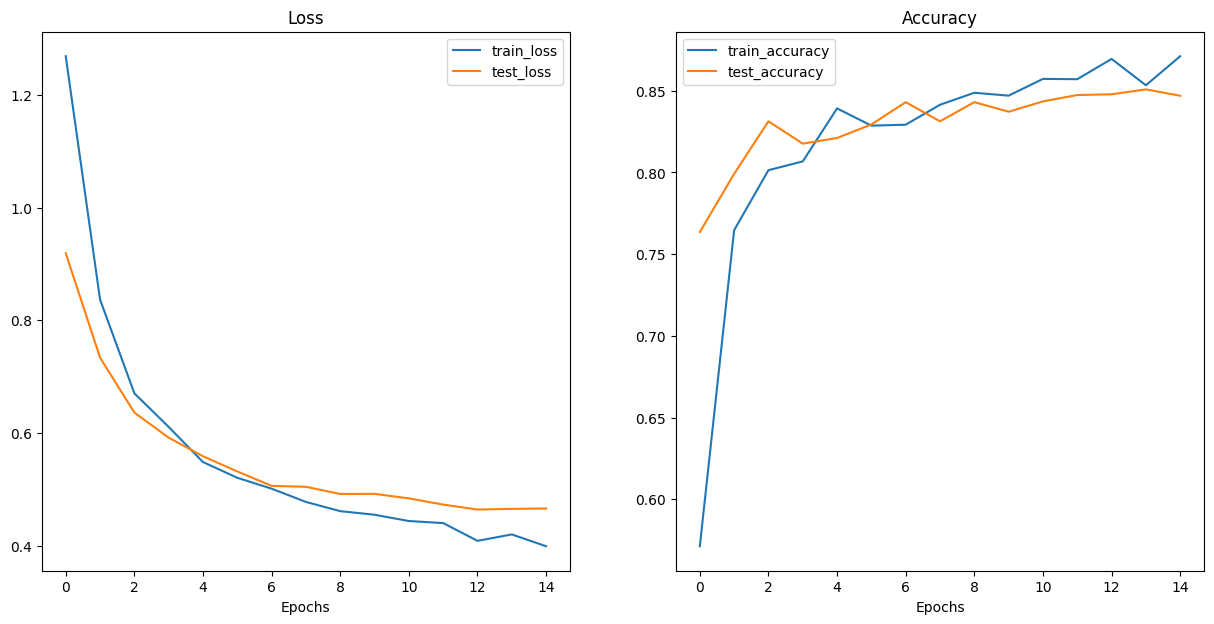

In [52]:
plot_loss_curves(results_1)

###11.1.6. Calculate Confusion Matrix and the Various evaluation Matrix

<Figure size 700x700 with 0 Axes>

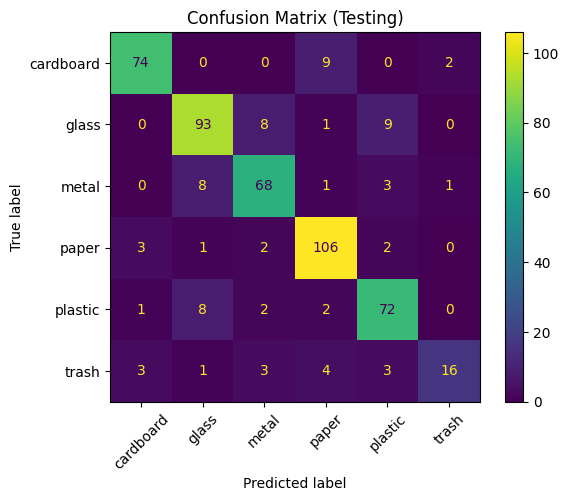


Classification Report (Testing):

              precision    recall  f1-score   support

   cardboard     0.9136    0.8706    0.8916        85
       glass     0.8378    0.8378    0.8378       111
       metal     0.8193    0.8395    0.8293        81
       paper     0.8618    0.9298    0.8945       114
     plastic     0.8090    0.8471    0.8276        85
       trash     0.8421    0.5333    0.6531        30

    accuracy                         0.8478       506
   macro avg     0.8473    0.8097    0.8223       506
weighted avg     0.8484    0.8478    0.8456       506



In [53]:
confusion_matrix_and_evaluation_metics(model=model_1,class_names=class_names)

###11.1.7. Infrence test speed

In [54]:
# Run the inference test
test_inference_speed(model_1, test_loader, device, num_batches=10)

⚡ Inference Performance Summary (CUDA)
 - Tested on 320 images (10 batches)
 - Avg Inference Time: 1.594 ms/image
 - Throughput: 193.61 images/sec


(1.594312903124262, 193.60623867064717)

#12. Mobile Net

##12.1. Load Mobile Net pretrained weights & Summarize with torchinfo

In [55]:
## Mobile Net
model_2 = models.mobilenet_v2(weights="IMAGENET1K_V1")  # pretrained on ImageNet
model_2

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 155MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [56]:
# Visualize model architecture
summary(
    model_2,
    input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
    # col_names=["input_size"], # uncomment for smaller output
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
)


Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
MobileNetV2 (MobileNetV2)                     [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                       [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)               [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                        [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                   [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─ReLU6 (2)                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─InvertedResidual (1)                   [32, 32, 112, 112]   [32, 16, 112, 112]   --                   True
│    │    └─Sequential (conv)                 [32, 32, 112, 112]   [32, 16, 112, 112]

###12.1.1. Freeze all the parameter

In [57]:
# 2️⃣ Freeze all convolutional (feature extractor) layers
for param in model_2.features.parameters():
    param.requires_grad = False

# 3️⃣ Replace the classifier for your custom number of classes
num_classes = 6  # 🔁 change this for your dataset
model_2.classifier[1] = nn.Linear(model_2.last_channel, num_classes)

###12.1.2. Train & Test the Model

In [58]:
# train (val_loader is your test_dataloader here)

optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.001)

results_2 = train(
    model=model_2,
    train_dataloader=train_loader,
    test_dataloader=test_loader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=15,
    device=device
)

results_2

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1066 | train_acc: 0.6067 | test_loss: 0.7182 | test_acc: 0.7527
Epoch: 2 | train_loss: 0.6640 | train_acc: 0.7876 | test_loss: 0.5570 | test_acc: 0.8137
Epoch: 3 | train_loss: 0.5636 | train_acc: 0.8105 | test_loss: 0.4958 | test_acc: 0.8211
Epoch: 4 | train_loss: 0.5119 | train_acc: 0.8346 | test_loss: 0.4676 | test_acc: 0.8410
Epoch: 5 | train_loss: 0.4849 | train_acc: 0.8419 | test_loss: 0.4579 | test_acc: 0.8367
Epoch: 6 | train_loss: 0.4676 | train_acc: 0.8390 | test_loss: 0.4349 | test_acc: 0.8391
Epoch: 7 | train_loss: 0.4389 | train_acc: 0.8507 | test_loss: 0.4483 | test_acc: 0.8395
Epoch: 8 | train_loss: 0.4150 | train_acc: 0.8618 | test_loss: 0.4219 | test_acc: 0.8547
Epoch: 9 | train_loss: 0.3928 | train_acc: 0.8629 | test_loss: 0.4352 | test_acc: 0.8556
Epoch: 10 | train_loss: 0.3850 | train_acc: 0.8715 | test_loss: 0.4141 | test_acc: 0.8532
Epoch: 11 | train_loss: 0.3742 | train_acc: 0.8746 | test_loss: 0.4145 | test_acc: 0.8513
Epoch: 12 | train_l

{'train_loss': [1.1065976172685623,
  0.6640163599513471,
  0.5636090314947069,
  0.5118725921493024,
  0.4849202870391309,
  0.467569297645241,
  0.4388909940607846,
  0.41500934632495046,
  0.3927701518405229,
  0.3849840594921261,
  0.3742363800993189,
  0.36578296520747244,
  0.34799331007525325,
  0.33029390254523605,
  0.34004347841255367],
 'train_acc': [0.60673828125,
  0.78759765625,
  0.810546875,
  0.8345703125,
  0.84189453125,
  0.83896484375,
  0.85068359375,
  0.86181640625,
  0.862890625,
  0.871484375,
  0.874609375,
  0.87236328125,
  0.89111328125,
  0.8875,
  0.88017578125],
 'test_loss': [0.7181721925735474,
  0.5569885466247797,
  0.4958338085561991,
  0.4676082171499729,
  0.45793449971824884,
  0.4349345564842224,
  0.4483179394155741,
  0.4219037676230073,
  0.4351942138746381,
  0.4141166750341654,
  0.4145437814295292,
  0.4156174175441265,
  0.4025476472452283,
  0.4147866293787956,
  0.4089642306789756],
 'test_acc': [0.7527043269230769,
  0.813701923076923

###12.1.3. Visualize the loss curve & Accuracy

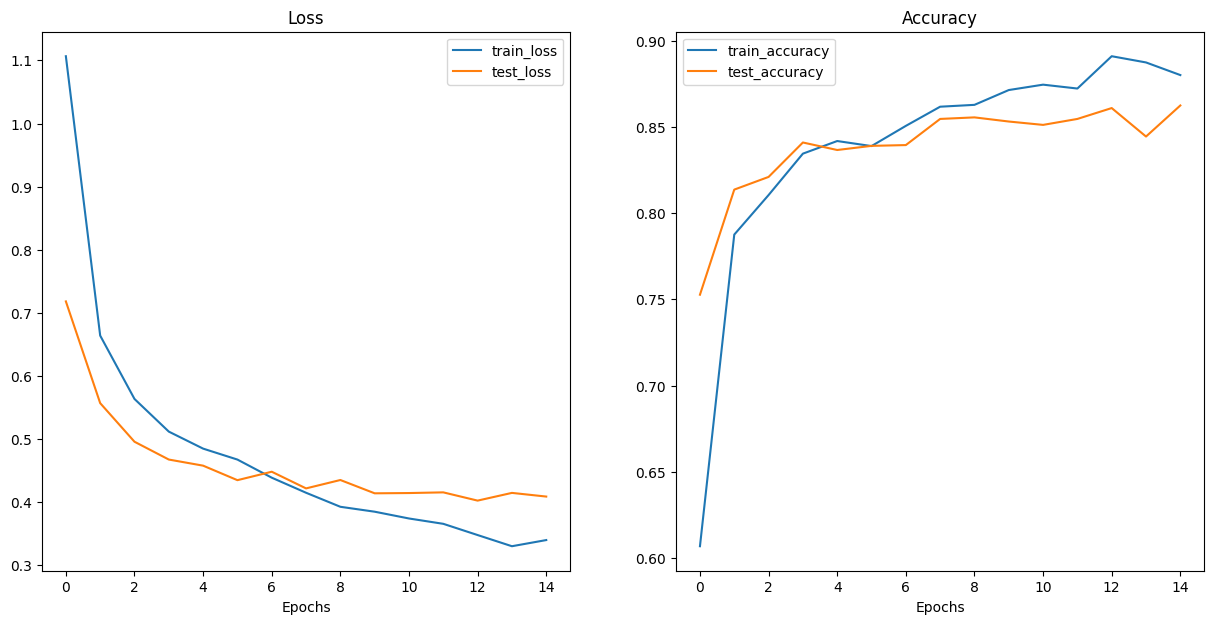

In [59]:
plot_loss_curves(results=results_2)

###12.1.4. Confusion Matrix & Various evluation Matrix

<Figure size 700x700 with 0 Axes>

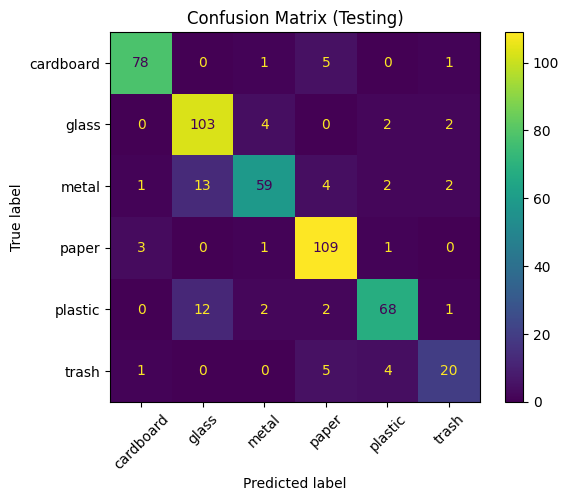


Classification Report (Testing):

              precision    recall  f1-score   support

   cardboard     0.9398    0.9176    0.9286        85
       glass     0.8047    0.9279    0.8619       111
       metal     0.8806    0.7284    0.7973        81
       paper     0.8720    0.9561    0.9121       114
     plastic     0.8831    0.8000    0.8395        85
       trash     0.7692    0.6667    0.7143        30

    accuracy                         0.8636       506
   macro avg     0.8582    0.8328    0.8423       506
weighted avg     0.8658    0.8636    0.8616       506



In [60]:
confusion_matrix_and_evaluation_metics(model=model_2, class_names=class_names)

###12.1.5. Infrence test Speed

In [61]:
# Run the inference test
test_inference_speed(model_2, test_loader, device, num_batches=10)

⚡ Inference Performance Summary (CUDA)
 - Tested on 320 images (10 batches)
 - Avg Inference Time: 1.169 ms/image
 - Throughput: 207.62 images/sec


(1.169225049999767, 207.61900217890656)

#13. CONV Net TINY


##13.1. Load CONV Net TINY pretrained weights & Summarize with torchinfo

In [62]:
## CONV Net TINY
model_3 = models.convnext_tiny(weights="ConvNeXt_Tiny_Weights.DEFAULT")  # pretrained on ConvNet
model_3

Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny-983f1562.pth


100%|██████████| 109M/109M [00:00<00:00, 203MB/s]


ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=

In [63]:
# Visualize model architecture
summary(
    model_3,
    input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
    # col_names=["input_size"], # uncomment for smaller output
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
)


Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
ConvNeXt (ConvNeXt)                                     [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                 [32, 3, 224, 224]    [32, 768, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                         [32, 3, 224, 224]    [32, 96, 56, 56]     --                   True
│    │    └─Conv2d (0)                                  [32, 3, 224, 224]    [32, 96, 56, 56]     4,704                True
│    │    └─LayerNorm2d (1)                             [32, 96, 56, 56]     [32, 96, 56, 56]     192                  True
│    └─Sequential (1)                                   [32, 96, 56, 56]     [32, 96, 56, 56]     --                   True
│    │    └─CNBlock (0)                                 [32, 96, 56, 56]     [32, 96, 56, 56]     79,296               True
│  

###13.1.1. Freeze all the parameter

In [64]:
# 2️⃣ Freeze all convolutional (feature extractor) layers
for param in model_3.features.parameters():
    param.requires_grad = False

# 3️⃣ Replace the classifier for your custom number of classes
num_classes = 6  # 🔁 change this for your dataset
model_3.classifier[2] = nn.Linear(model_3.classifier[2].in_features, num_classes)

In [65]:
# Visualize model architecture
summary(
    model_3,
    input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
    # col_names=["input_size"], # uncomment for smaller output
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
)

Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
ConvNeXt (ConvNeXt)                                     [32, 3, 224, 224]    [32, 6]              --                   Partial
├─Sequential (features)                                 [32, 3, 224, 224]    [32, 768, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                         [32, 3, 224, 224]    [32, 96, 56, 56]     --                   False
│    │    └─Conv2d (0)                                  [32, 3, 224, 224]    [32, 96, 56, 56]     (4,704)              False
│    │    └─LayerNorm2d (1)                             [32, 96, 56, 56]     [32, 96, 56, 56]     (192)                False
│    └─Sequential (1)                                   [32, 96, 56, 56]     [32, 96, 56, 56]     --                   False
│    │    └─CNBlock (0)                                 [32, 96, 56, 56]     [32, 96, 56, 56]     (79,296)             

###13.1.2. Train & Test the model

In [66]:
# train (val_loader is your test_dataloader here)

optimizer = torch.optim.Adam(params=model_3.parameters(), lr=0.001)

results_3 = train(
    model=model_3,
    train_dataloader=train_loader,
    test_dataloader=test_loader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=15,

    device=device
)

results_3

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.2070 | train_acc: 0.6217 | test_loss: 0.8603 | test_acc: 0.7922
Epoch: 2 | train_loss: 0.7546 | train_acc: 0.7882 | test_loss: 0.6707 | test_acc: 0.8206
Epoch: 3 | train_loss: 0.6096 | train_acc: 0.8333 | test_loss: 0.5899 | test_acc: 0.8356
Epoch: 4 | train_loss: 0.5297 | train_acc: 0.8487 | test_loss: 0.5227 | test_acc: 0.8489
Epoch: 5 | train_loss: 0.4646 | train_acc: 0.8758 | test_loss: 0.4859 | test_acc: 0.8508
Epoch: 6 | train_loss: 0.4248 | train_acc: 0.8740 | test_loss: 0.4605 | test_acc: 0.8489
Epoch: 7 | train_loss: 0.4003 | train_acc: 0.8841 | test_loss: 0.4412 | test_acc: 0.8586
Epoch: 8 | train_loss: 0.3608 | train_acc: 0.8963 | test_loss: 0.4193 | test_acc: 0.8625
Epoch: 9 | train_loss: 0.3414 | train_acc: 0.8938 | test_loss: 0.4100 | test_acc: 0.8664
Epoch: 10 | train_loss: 0.3258 | train_acc: 0.9004 | test_loss: 0.3936 | test_acc: 0.8664
Epoch: 11 | train_loss: 0.2992 | train_acc: 0.9092 | test_loss: 0.3805 | test_acc: 0.8688
Epoch: 12 | train_l

{'train_loss': [1.206971070729196,
  0.7545905862934887,
  0.6096239606849849,
  0.5297424425370991,
  0.4645782969892025,
  0.4247628313023597,
  0.400256052846089,
  0.3608130526263267,
  0.34142711106687784,
  0.32578906370326877,
  0.29915614263154566,
  0.29129182710312307,
  0.2840475325938314,
  0.2577412552200258,
  0.24906966951675713],
 'train_acc': [0.6216796875,
  0.78818359375,
  0.83330078125,
  0.84873046875,
  0.87578125,
  0.8740234375,
  0.88408203125,
  0.8962890625,
  0.89384765625,
  0.900390625,
  0.9091796875,
  0.91240234375,
  0.9197265625,
  0.93017578125,
  0.93359375],
 'test_loss': [0.860292986035347,
  0.6707264184951782,
  0.5899404529482126,
  0.5227353163063526,
  0.48589381389319897,
  0.46052777022123337,
  0.44121215492486954,
  0.41927759628742933,
  0.40997253078967333,
  0.39359669759869576,
  0.38045281637459993,
  0.37455578800290823,
  0.3650228912010789,
  0.3597214240580797,
  0.3672081418335438],
 'test_acc': [0.7922175480769231,
  0.8206129

###13.1.3. Visualize the loss curve & Accuracy

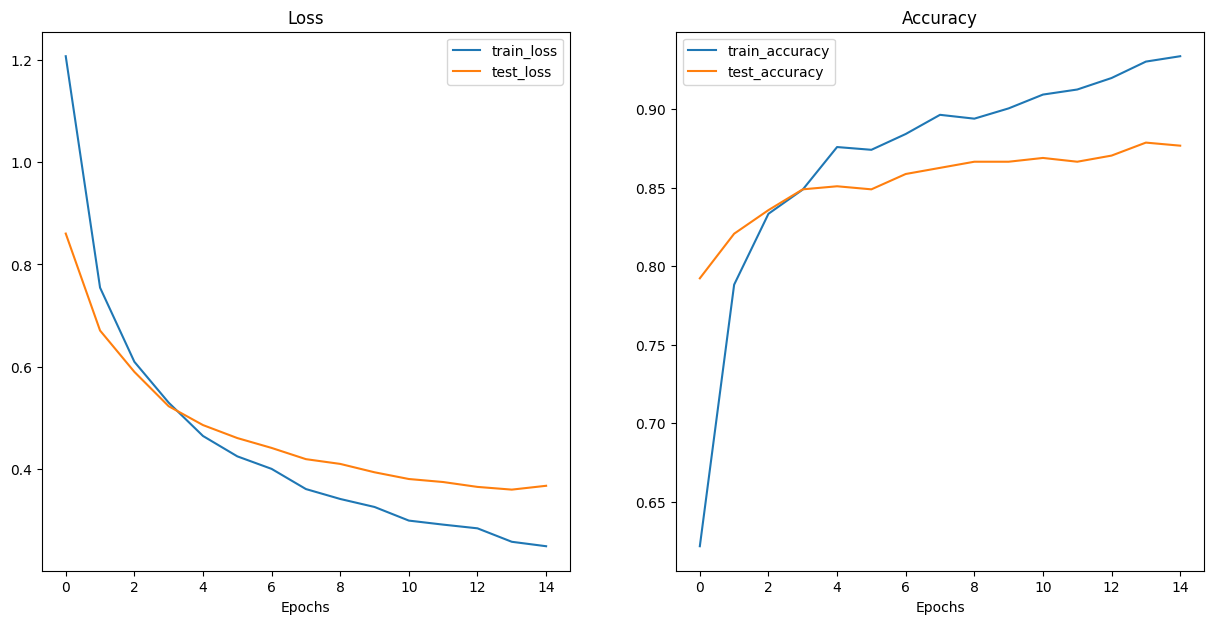

In [67]:
plot_loss_curves(results_3)

###13.1.4. Confusion Matrix and Various evaluation Matrix

<Figure size 700x700 with 0 Axes>

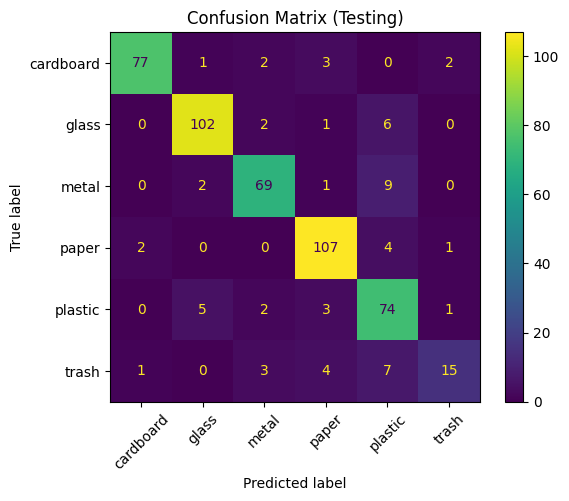


Classification Report (Testing):

              precision    recall  f1-score   support

   cardboard     0.9625    0.9059    0.9333        85
       glass     0.9273    0.9189    0.9231       111
       metal     0.8846    0.8519    0.8679        81
       paper     0.8992    0.9386    0.9185       114
     plastic     0.7400    0.8706    0.8000        85
       trash     0.7895    0.5000    0.6122        30

    accuracy                         0.8775       506
   macro avg     0.8672    0.8310    0.8425       506
weighted avg     0.8804    0.8775    0.8758       506



In [68]:
confusion_matrix_and_evaluation_metics(model=model_3, class_names=class_names)

###13.1.5. Inference test speed

In [69]:
# Run the inference test
test_inference_speed(model_3, test_loader, device, num_batches=10)

⚡ Inference Performance Summary (CUDA)
 - Tested on 320 images (10 batches)
 - Avg Inference Time: 3.623 ms/image
 - Throughput: 137.41 images/sec


(3.6234418500008303, 137.4088519421355)